# Verifica $R_0$ modello *RUIYUN LI*

Introduciamo il modello:
\begin{align}
\begin{cases}
\dot{S_i} = - \frac{ \beta S_i I_{i}^r }{N_i} - \frac{ \mu \beta S_i I_{i}^u }{N_i}  \\
\dot{E_i} = \frac{\beta S_i I_{i}^r}{N_i} + \frac{\mu \beta S_i I_{i}^u}{N_i} - \frac{E_i}{Z}  \\
\dot{I_{i}^r} = \alpha \frac{E_i}{Z} - \frac{I_{i}^r}{D} \\
\dot{I_{i}^u} = (1-\alpha) \frac{E_i}{Z} - \frac{I_{i}^u}{D}  \\
N_i = N_0
\end{cases}
\end{align}

$\beta$ = rate di trasmissione; 

$\mu$ = riduzione del rate di trasmissione dovuto ai casi non documentati;

$\alpha$ = frazione di infezioni documentate;

$Z$ = periodo medio di latenza;

$D$ = durata media dell'infezione;

$R_n = \alpha \beta D +(1-\alpha)\mu \beta D$ =  *effective reproduction number* ;

$M_{ij}$ = numero giornaliero di persone che si muovono dalla città *i* alla città *j* ;

$\theta$ = fattore $>1$ che riflette una sotto-stima dei movimenti delle persone;



Sarà necessario importare le seguenti librerie: *numpy*, *scipy*, *matplot*. Di seguito vengono importate:


In [15]:
import numpy as np                                  # libreria matematica
import scipy as sp
import matplotlib.pyplot as plt                     # librerie grafiche
import matplotlib.colors as mcolors

from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni


## Definiamo i parametri
Sia $n$ = *numero città* considerate, $NEQ$ **= *numero equazioni per città*** .

Allora il numero totale di equazioni che comporranno il sistema sarà $nNEQ$.


Per adesso ci limitiamo ad assegnare un valore fissato ad ognuno dei parametri:

In [23]:
NEQ = 4         #numero equazioni
n = 1           #numero città

# fissiamo i parametri
beta = 1.12
mu = 0.5
alfa = 0.5
Z = 5                    #days
D = 1.4                  #days
teta = 1.1

Ro = alfa*beta*D + ( 1 - alfa )*mu*beta*D   
print(Ro)

1.1760000000000002


# Utilizziamo Runge-Kutta del 4° ordine

## Definiamo la funzione *RK4*

### 1) Definisco una funzione *campo vettoriale* utile per integrare con *RK4*:

In [24]:
#funzione campo vettoriale per RK4

def f(x, K, N, n, NEQ) :
   
  
        
############################################ COSTRUISCO TUTTI GLI U ######################################################

    U1  = np.zeros(NEQ + 1)
    U2  = np.zeros(NEQ + 1)
    U3s  = np.zeros(NEQ + 1)
    U4s  = np.zeros(NEQ + 1)
    U5  = np.zeros(NEQ + 1)
    U6  = np.zeros(NEQ + 1)         # Spazio allocato per tutte le variabili
    U7s  = np.zeros(NEQ + 1)
    U8s  = np.zeros(NEQ + 1)
    U9  = np.zeros(NEQ + 1)
    U10 = np.zeros(NEQ + 1)
    U11s = np.zeros(NEQ + 1)
    U12s = np.zeros(NEQ + 1)
    
    for i in range(1, n + 1):
        
    
 
        
        U1  = (beta*X[i][1]*X[i][3])/N[i]
        U2  = (mu*beta*X[i][1]*X[i][4])/N[1]
        U5  = alfa*X[i][2] / Z
        U6  = (1 - alfa)* X[i][2] / Z                          # costruisco gli U rimanenti
        U9  = X[i][3] / D
        U10 = X[i][4] / D

###################################### SOMMO GLI U PER FORMARE LE EQUAZIONI ############################################
        
        K[i][1] = - U1 - U2 
        K[i][2] = U1 + U2 - U5 - U6 
        K[i][3] = U5 - U9
        K[i][4] = U6 - U10 
 
    return K, N

### 2) Definiamo la vera e propria funzione *RK4*:

**ATTENZIONE: stiamo considerando una integrazione con passo  1 giorno**

In [25]:
# h è il passo di integrazione #

h = 1.0   #Integrazione con passo 1 giorno

########################################    FUNZIONE RK4    ###################################################################

def RK4(X, N, h, n, NEQ):
    
    X2 = np.zeros((n + 1, NEQ + 1))                 #spazio allocato
    k1 = np.zeros((n + 1, NEQ + 1))
    k2 = np.zeros((n + 1, NEQ + 1))
    k3 = np.zeros((n + 1, NEQ + 1))
    k4 = np.zeros((n + 1, NEQ + 1))
    
##  STEP 1
        
    for i in range(1, n + 1):
        for j in range(1, NEQ + 1):
            X2[i][j] = X[i][j]                 #copio in X2 i dati iniziali
            
    f(X2, k1, N, n, NEQ)
    
##  STEP 2
        
    for i in range(1, n + 1):                   
        for j in range(1, NEQ + 1):
            X2[i][j] = X[i][j] + k1[i][j] * h/2                     
    f(X2, k2, N, n, NEQ)
    
##  STEP 3
        
    for i in range(1, n + 1):
        for j in range(1, NEQ + 1):
            X2[i][j] = X[i][j] + k2[i][j] * h/2           
    f(X2, k3, N, n, NEQ)
    
##  STEP 4

    for i in range(1, n + 1):
        for j in range(1, NEQ + 1):
            X2[i][j] = X[i][j] + k2[i][j] * h/2           
    f(X2, k4, N, n, NEQ)

##  STEP 5

    for i in range(1, n + 1):
        for j in range(1, NEQ + 1):
            X[i][j] = X[i][j] + h * ( k1[i][j] /6 +  k2[i][j] / 3 +  k3[i][j] /3 + k4[i][j] /6)   
            
    return

## Integriamo con RK4:
### Dati iniziali ed effettiva integrazione

In [26]:
#numero iniziale di abitanti nelle città
N0 = np.array([0, 5001.])

#vettore con tutte le componenti del sistema:
X = np.zeros((n + 1, NEQ + 1))                        #LEGENDA:  S = [][1] ; E = [][2] ; Ir = [][3] ; Iu = [][4]

#dati iniziali
X[1][1] = 5000.      # S1 = 5000
X[1][4] = 100.         # I1u = 1  


#intervallo di tempo su cui integrare
ndays = 500
t = np.linspace(0, ndays -1 , ndays)

# definisco le liste che conterranno i risultati dell'integrazione
S1  = X[1][1]
E1  = X[1][2]
I1r = X[1][3]
I1u = X[1][4]



# effettiva integrazione  
for r in range(1,len(t)):     # uso len(t) perchè altrimenti farei un passo di integrazione in più
    RK4(X, N0, h, n, NEQ)

    S1  = np.append(S1,X[1][1])
    E1  = np.append(E1,X[1][2])
    I1r = np.append(I1r,X[1][3])
    I1u = np.append(I1u,X[1][4])

  


## GRAFICI
### Grafici città 1

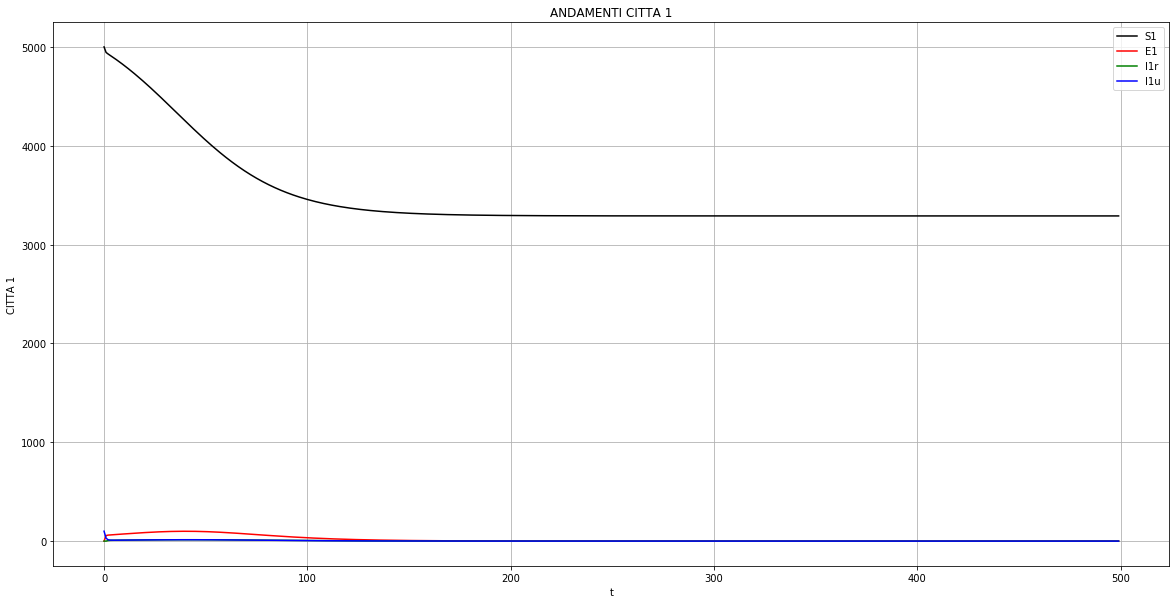

In [27]:
plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(t, S1 ,'k',linewidth=1.5, label='S1')    
plt.plot(t, E1,'r-',linewidth=1.5, label='E1')   
plt.plot(t, I1r,'g-',linewidth=1.5, label='I1r')
plt.plot(t, I1u,'b-',linewidth=1.5, label='I1u')

plt.xlabel('t')
plt.ylabel('CITTA 1')
plt.title('ANDAMENTI CITTA 1')
plt.grid(True)
plt.legend()

plt.show()